In [1]:
import sys
sys.path.append('../../')
sys.path.append('../../../flaming-choripan')

In [2]:
from flamingchoripan.files import search_for_filedirs
from lchandler import C_

root_folder = 'save'
filedirs = search_for_filedirs(root_folder, fext=C_.EXT_SPLIT_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (save)
(0) - save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd - 1.811[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────
filedirs after searching with filters: (save)
(0) - save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd - 1.811[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────


In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir
from lchandler import C_

def load_lcdataset(filename):
    assert filename.split('.')[-1]==C_.EXT_SPLIT_LIGHTCURVE
    return load_pickle(filename)

filedir = 'save/PLAsTiCCv1/survey-PLAsTiCCv1_bands-gr_mode-onlySN_kfid-0.slcd'
filedir = 'save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd'
#filedir = 'save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNIa_kfid-0.slcd'
#filedir = 'save/FakeSNe/survey-FakeSNe_bands-gr_classes-3_kfid-0.slcd'

filedic = get_dict_from_filedir(filedir)
root_folder = filedic['*rootdir*']
cfilename = filedic['*cfilename*']
lcdataset = load_lcdataset(filedir)
print(lcdataset['raw'].keys())
print(lcdataset['raw'].get_random_lcobj(False).keys())
print(lcdataset)

> loading: save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd
dict_keys(['data', 'survey', 'description', 'band_names', 'class_names', 'obs_is_flux'])
dict_keys(['days', 'obs', 'obse', 'y'])
LCDataset(
(raw - samples 1,099)
 - samples: 1,099 - obs samples: 30,346 (g: 12,540 - r: 17,806)
 - max_length_serial: 205 - max_duration: 578.23[days]
 - population: SLSN: 21(1.91%) - SNIa: 799(72.70%) - SNIbc: 51(4.64%) - merSNII: 228(20.75%)
(raw_train - samples 877)
 - samples: 877 - obs samples: 24,182 (g: 10,010 - r: 14,172)
 - max_length_serial: 205 - max_duration: 578.23[days]
 - population: SLSN: 16(1.82%) - SNIa: 639(72.86%) - SNIbc: 40(4.56%) - merSNII: 182(20.75%)
(raw_val - samples 222)
 - samples: 222 - obs samples: 6,164 (g: 2,530 - r: 3,634)
 - max_length_serial: 108 - max_duration: 489.71[days]
 - population: SLSN: 5(2.25%) - SNIa: 160(72.07%) - SNIbc: 11(4.95%) - merSNII: 46(20.72%)
(train - samples 874)
 - samples: 874 - obs samples: 22,636 (g: 9,389 - r: 1

# get error distribution fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0.005263798, 0.008532606, 0.0155579895, 0.019997641, 0.018745638, 0.022165947] [0.021881083, 0.049767867, 0.06687151, 0.08277154, 0.11812918, 0.13214533]
[0.004221361, 0.008310739, 0.012899417, 0.020124651, 0.021452866, 0.022023194] [0.023637729, 0.04949062, 0.066148564, 0.09305966, 0.10513784, 0.14686806]


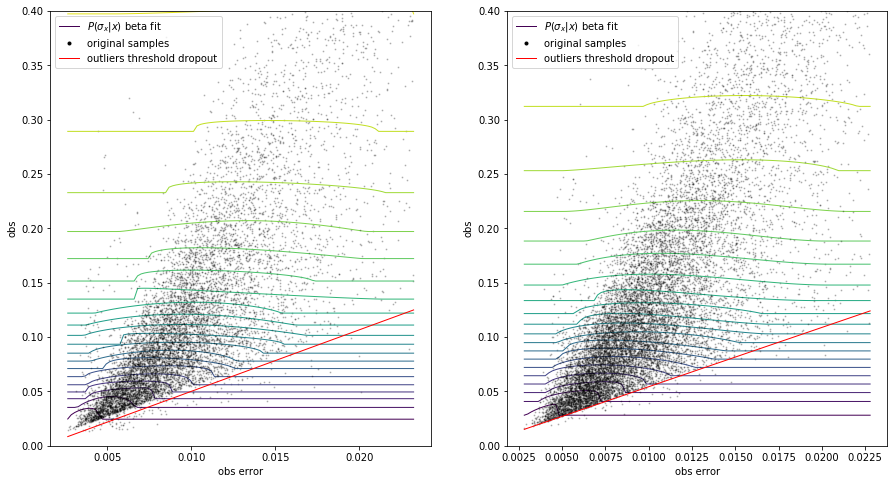

In [603]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.distr_fitting import ObsErrorConditionalSampler
from lchandler.plots.plots import plot_obse_samplers

ObsErrorConditionalSampler
band_names = lcdataset[set_name].band_names
obse_sampler_bdict = {b:ObsErrorConditionalSampler(lcdataset, set_name, b) for b in band_names}
plot_obse_samplers(obse_sampler_bdict)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
distr_name: rayleigh - band: g - samples: 9,389 - params: (0.002627561410665512, 0.006082691281962534)
distr_name: rayleigh - band: r - samples: 13,247 - params: (0.002805268002450466, 0.006038025786866321)
distr_name: expon - band: g - samples: 9,389 - params: (0.002627561410665512, 0.00748659895569086)
distr_name: expon - band: r - samples: 13,247 - params: (0.002805268002450466, 0.007529470527768135)
distr_name: chi - band: g - samples: 9,389 - params: (1.853317370629383, 0.002627561410665512, 0.006318942005074182)
distr_name: chi - band: r - samples: 13,247 - params: (2.0712806959539467, 0.002805268002450466, 0.005932918989799762)
distr_name: gamma - band: g - samples: 9,389 - params: (3.008173856078334, 0.002627561410665512, 0.0024887521100910863)
distr_name: gamma - band: r - samples: 13,247 - params: (3.4521586941315774, 0.002805268002450466, 0.0021810905207552103)


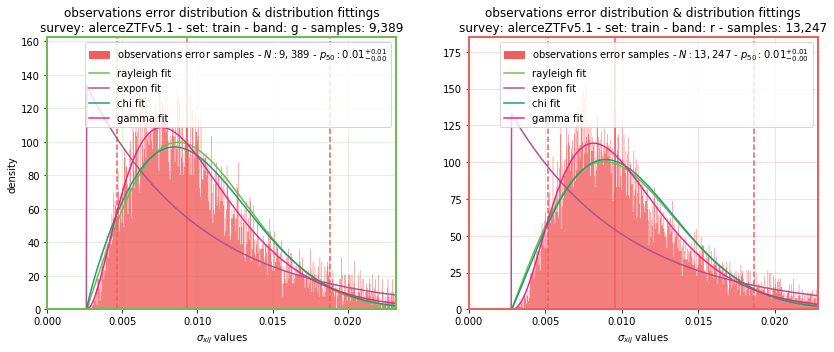

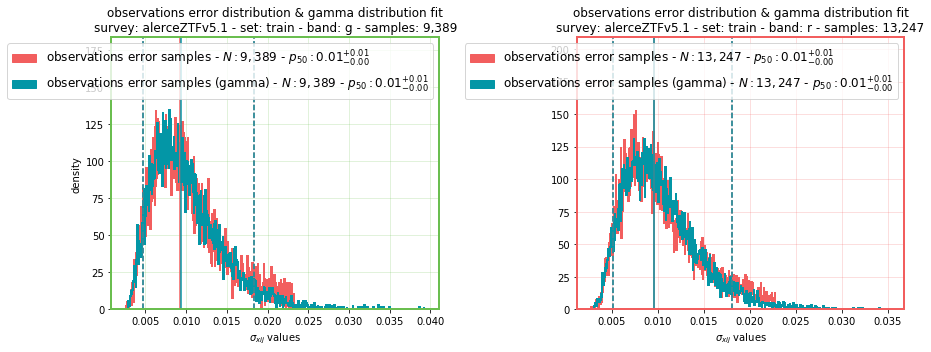

In [82]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.distr_fitting import ObsErrorConditionalSampler
from lchandler.plots.plots import plot_values_fit_results, plot_values_fit_distr_sampler

set_name = 'train'
distr_names = ['rayleigh', 'expon', 'chi', 'gamma']#+ ['chi', 'skewnorm', 'beta']
fit_results = get_values_distribution_fits(lcdataset, set_name, distr_names)
plot_values_fit_results(lcdataset, set_name, fit_results)
obse_sampler = ValuesSampler(fit_results, 'gamma')
plot_values_fit_distr_sampler(lcdataset, set_name, obse_sampler, figsize=(13,5))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


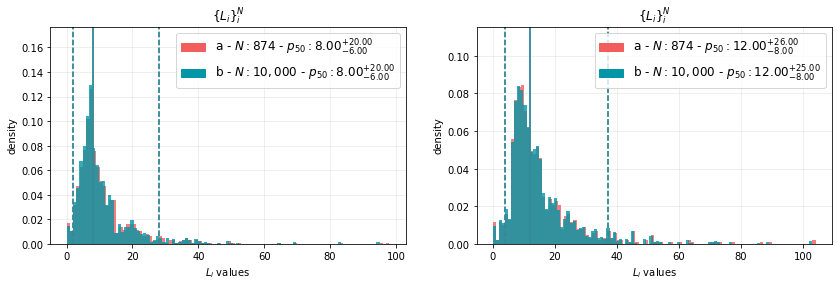

In [428]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.distr_fitting import CurveLengthSampler
import matplotlib.pyplot as plt
import flamingchoripan.cuteplots.plots as cplots

set_name = 'train'
#fit_results = get_len_distribution_fits(lcdataset, set_name, distr_names)
#plot_len_fit_results(lcdataset, set_name, fit_results)
band_names = lcdataset[set_name].band_names
length_sampler_bdict = {b:CurveLengthSampler(lcdataset, set_name, b) for b in band_names}

fig, axs = plt.subplots(1, len(lcdataset[set_name].band_names), figsize=(14,4))
for kb,b in enumerate(lcdataset[set_name].band_names):
    length_sampler = length_sampler_bdict[b]
    #print(len_sampler.sample(10))
    to_plot = {
        'a':length_sampler.lengths,
        'b':length_sampler.sample(1e4),
              }
    plot_kwargs = {
        'fig':fig,
        'ax':axs[kb],
        'title':'$\{L_i\}_i^N$',
        'xlabel':'$L_i$ values',
        'bins':len(length_sampler.pdf),
        'uses_density':1,
        'return_legend_patches':1,
        'label_samples':0,
        'histtype':'stepfilled',
        'alpha':0.8,
    }
    cplots.plot_hist_bins(to_plot, **plot_kwargs)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/opimentel/anaconda3/envs/lchandler/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[]

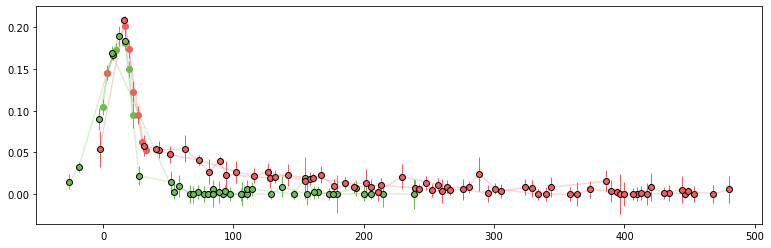

In [230]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.synthetic_curve_generators import FakeSNeGeneratorCF
from lchandler.plots.lc import plot_lightcurve
import matplotlib.pyplot as plt

lcobj = lcdataset['raw'].get_random_lcobj(return_key=0)
band_names = lcdataset['raw'].band_names
aa = FakeSNeGeneratorCF(lcobj, band_names, obse_sampler, len_sampler)
new_lcobjs = aa.sample_curves(2)

fig, ax = plt.subplots(1,1,figsize=(13,4))
for b in band_names:
    plot_lightcurve(ax, lcobj, b)
    
for b in band_names:
    for new_lcobj in new_lcobjs:
        plot_lightcurve(ax, new_lcobj, b, is_synthetic=1)
    
plt.plot()

# generate synth data

In [ ]:
%load_ext autoreload
%autoreload 2
from src.curve_fits import calculate_parametric_model, get_synth_dataset

get_from_synthetic = False
desired_class_samples = 1000
#desired_class_samples = 2000
#desired_class_samples = 1000; get_from_synthetic = True # for umap

for set_name in ['train', 'val']:
    calculate_parametric_model(lcdataset, set_name)
    
for set_name in ['train']:
    get_synth_dataset(lcdataset, set_name, desired_class_samples, obse_sampler, len_sampler,
                     get_from_synthetic=get_from_synthetic,
                     )
    
print(lcdataset)

In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import flamingchoripan.cutePlots.colors as cc
import flamingchoripan.cutePlots.plots as cplots

figsize = (12,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
for ks,set_name in enumerate(['synth_train']):
    lcset = lcdataset.get(set_name)
    lcobj_classes = lcset.get_lcobj_classes()
    to_plot = {'class samples':lcobj_classes}
    title = 'class population distribution\n'
    title += f'survey: {lcset.survey} - set: {set_name} - class samples: {len(lcobj_classes):,}'
    plt_kwargs = {
        'fig':fig,
        'ax':ax,
        'ylabel':'' if ks>0 else None,
        'legend_ncol':len(lcset.band_names),
        'title':title,
        'cmap':cc.colorlist_to_cmap([cc.NICE_COLORS_DICT['nice_gray']]),
        'uses_log_scale':0,
    }
    fig, ax = cplots.plot_hist_labels(to_plot, lcset.class_names, **plt_kwargs)
    
fig.tight_layout()
plt.plot()

In [ ]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_synthetic_samples

plot_synthetic_samples(lcdataset, 'train', max_samples=1)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.umaps import get_fitted_umap, get_transformed_umap

set_name_train = 'train'
set_name_test = 'synth_train'
30
pm_umap_results = get_fitted_umap(lcdataset, set_name_test)
res = get_transformed_umap(lcdataset, pm_umap_results, set_name_train, set_name_test)
pm_args_embd_results_train, pm_args_embd_results_test = res

In [ ]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_2Dprojections

for c in [None]+lcdataset.raw.class_names:
    kwargs = {
        'target_class':c,
        #'x_mode':'x_pca',
        'x_mode':'x_umap',
        'x_mode':'x_tsne',
    }
    plot_2Dprojections(lcdataset, set_name_train, pm_args_embd_results_train, set_name_test, pm_args_embd_results_test, **kwargs)

In [ ]:
from flamingchoripan.myUtils.files import load_pickle, save_pickle
from src import C_

assert 0
save_filedir = f'{root_folder}/{cfilename}.{C_.EXT_PARAMETRIC_LIGHTCURVE}'
save_pickle(save_filedir, lcdataset)